**B5**

Коцевич Андрей, Б02-920

Теоретические задачи 4-6 решены в отдельном файле.

In [2]:
import numpy as np
import scipy.linalg as scl
from matplotlib import pyplot as plt

**1.** Напишите программу, реализующую приближённое решение системы линейных алгебраических уравнений итерационным методом наискорейшего спуска. С её помощью найдите решение системы уравнений с матрицей Гильберта:
$$Ax=f,\quad a_{ij}=\frac{1}{i+j-1},\quad f_i=\sum\limits_{j=1}^na_{ij}$$
С какой скоростью метод сходится в зависимости от $n$?   

In [20]:
def steepest_descent(A, f, e, q=0): #метод наискорейшего спуска
  x = np.zeros((A.shape[0],1))
  r = A @ x-f
  iter = 0
  rs = []
  iters = []
  while (scl.norm(r,2)>e) & (scl.norm(r,2)<1e3):
    alpha = 0.5*(r.T @ r)/((A @ r).T @ r)
    x = x-alpha*r
    rs.append(scl.norm(r,2))
    iters.append(iter) 
    r = A @ x - f
    iter += 1
  if q == 0:
    return x, iter
  return rs, iters

In [3]:
def init(n): #инициализация матрицы A и столбца f
  A=np.zeros((n,n))
  for i in range (n):
    for j in range (n):
      A[i][j]=1/(i+j+1)
  f=np.zeros(n)
  for i in range(n):
    f[i]=np.sum(A,axis=0)[i]
  f=f.reshape(-1,1)
  return A, f
A, f = init(5)
steepest_descent(A, f, 0.01)

(array([[0.96482288],
        [1.14203449],
        [1.0454956 ],
        [0.93451362],
        [0.83740337]]), 3)

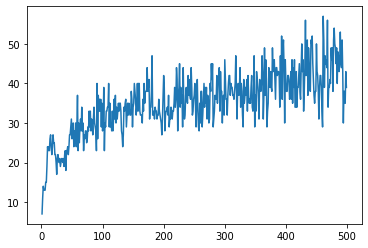

In [27]:
#зависимость числа итераций от n
iters = []
N = 500
for i in range(1, N):
  A, f = init(i)
  x,iter=steepest_descent(A, f, 0.01)
  iters.append(iter)
plt.plot(np.array(range(1, N)), iters)

Зависимость можно аппроксимировать как $O(\log n)$, поскольку рост медленный.

**2.** Напишите программу, реализующую приближённое решение системы линейных алгебраических уравнений методом сопряжённых градиентов. С её помощью найдите решение системы уравнений из предыдущей задачи. Сравните между собой скорости сходимости итерационных методов наискорейшего спуска и сопряжённых градиентов. 

In [28]:
def conjugate_gradients(A, f, e, q=0): #метод сопряжённых градиентов
  x = np.zeros((A.shape[0],1))
  r = A @ x-f
  s = r
  iter = 0
  rs = []
  iters = []
  while (scl.norm(r,2)>e) & (scl.norm(r,2)<1e6):
    alpha = (r.T @ r)/((A @ s).T @ s)
    x = x-alpha * s
    beta = ((A @ x-f).T @ (A @ x-f))/(r.T @ r)
    rs.append(scl.norm(r,2))
    iters.append(iter)
    r = A @ x - f
    s = r + beta * s
    iter += 1
  if q == 0:
    return x, iter
  return rs, iters

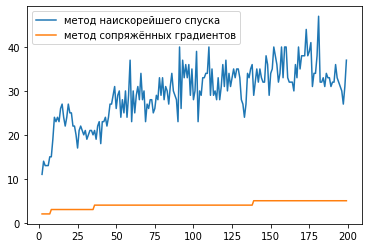

In [29]:
#зависимость от n методов наискорейшего спуска и сопряжённых градиентов на одном графике
iters1 = []
iters2 = []
N = 200
for i in range(2, N):
    A, f = init(i)
    x, iter = steepest_descent(A, f, 0.01)
    iters1.append(iter)
    x, iter = conjugate_gradients(A, f, 0.01)
    iters2.append(iter)
plt.plot(np.array(range(2, N)), iters1, label='метод наискорейшего спуска')
plt.plot(np.array(range(2, N)), iters2, label='метод сопряжённых градиентов')
plt.legend()

В методе сопряжённых градиентов скорость также $O(\log n)$. Как видно, метод сопряжённых градиентов работает быстрее.

**3.** Рассмотрим квадратичную строго выпуклую функцию ($A$ -- симметричная матрица): 
$$f(x)=\frac{1}{2}x^TAx-b^Tx$$
 Cгенерируйте случайным образом пару таких квадратичных функций и запустите на каждой из них оба метода (из одной и той же начальной точки). Постройте графики сходимости в терминах евклидовой нормы невязки $r_k = Ax_k − b$ (в логарифмической шкале) против номера итерации. При этом оба метода нарисуйте на одном и том же графике, но разными линиями: один — сплошным, другой — пунктиром.

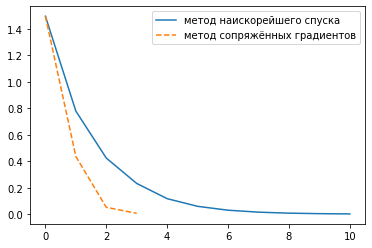

In [25]:
A=np.random.random((7,7))+2*np.eye(7) #1 матрица
A=A+A.T
f=np.random.random((1,7)).T
rs, iters = steepest_descent(A, f, 1e-3, 1)
plt.plot(iters, rs, label='метод наискорейшего спуска')
rs, iters = conjugate_gradients(A, f, 1e-3, 1)
plt.plot(iters, rs, linestyle = '--', label='метод сопряжённых градиентов')
plt.legend()

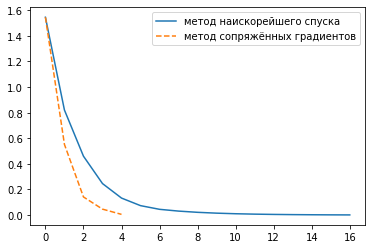

In [26]:
A=np.random.random((7,7))+2*np.eye(7) #2 матрица
A=A+A.T
f=np.random.random((1,7)).T
rs, iters = steepest_descent(A, f, 1e-3, 1)
plt.plot(iters, rs, label='метод наискорейшего спуска')
rs, iters = conjugate_gradients(A, f, 1e-3, 1)
plt.plot(iters, rs, linestyle = '--', label='метод сопряжённых градиентов')
plt.legend()

Возможно экспотенциальное спадание к 0. Метод сопряжённых градиентов сходится быстрее.